In [2]:
from fastai.vision import *

In [3]:
folder = 'lexus2007'
file = 'lexus2007.csv'

In [4]:
path = Path('lexus')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
download_images(path/file, dest, max_pics=200)

In [6]:
folder = 'lexus2014'
file = 'lexus2014.csv'

In [7]:
path = Path('lexus')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
download_images(path/file, dest, max_pics=200)

In [9]:
folder = 'lexus2019'
file = 'lexus2019.csv'

In [10]:
path = Path('lexus')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
download_images(path/file, dest, max_pics=200)

In [12]:
path.ls()

[PosixPath('lexus/.DS_Store'),
 PosixPath('lexus/lexus2019.csv'),
 PosixPath('lexus/lexus2007'),
 PosixPath('lexus/lexus2014'),
 PosixPath('lexus/models'),
 PosixPath('lexus/lexus2019'),
 PosixPath('lexus/lexus2014.csv'),
 PosixPath('lexus/lexus2007.csv')]

In [13]:
classes = ['lexus2007','lexus2014','lexus2019']

In [14]:
# download_images(path/file, dest, max_pics=200)

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

lexus2007


lexus2014


lexus2019


In [16]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['lexus2007', 'lexus2014', 'lexus2019']

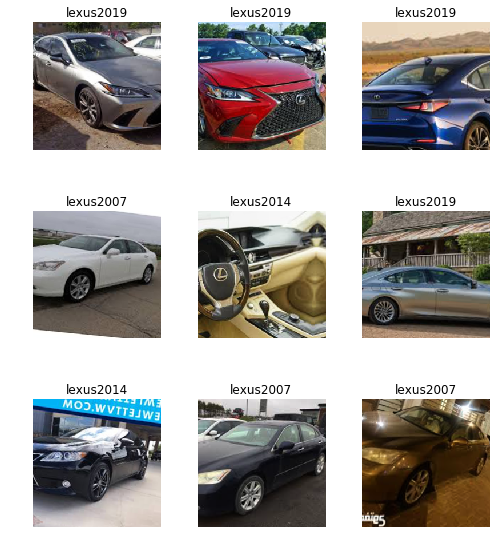

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['lexus2007', 'lexus2014', 'lexus2019'], 3, 480, 120)

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.693425,1.940527,0.600000,02:21
1,1.311697,0.991113,0.358333,02:14
2,1.075687,0.966093,0.316667,02:08
3,0.944935,0.967700,0.275000,02:05


In [22]:
learn.save('stage-1')

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


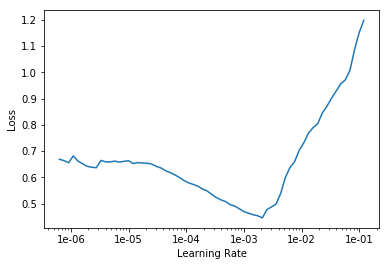

In [25]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.612886,0.877680,0.291667,03:03
1,0.501108,0.867622,0.300000,02:53


In [27]:
learn.save('stage-2')

In [28]:

learn.load('stage-2');

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

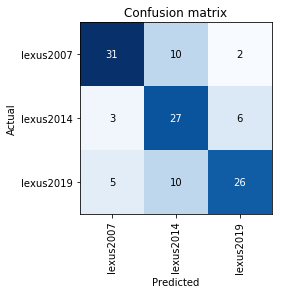

In [30]:
interp.plot_confusion_matrix()

In [35]:
from fastai.widgets import *

In [36]:

db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [37]:

learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [38]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [41]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [39]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [43]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [44]:

learn.export()

In [45]:
defaults.device = torch.device('cpu')

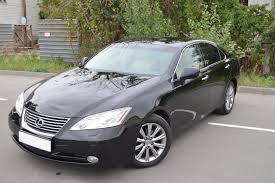

In [65]:
img = open_image(path/'lexus2007'/'00000021.jpg')
img

In [66]:
learn = load_learner(path)

In [67]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'lexus2007'